### ** Implementation in python **

Python is an ideal programming language for implementing the delivery route optimization solution using the genetic algorithm. Python is known for its simplicity, readability, and extensive library support, making it a popular choice for developing complex algorithms and data-driven applications. Its rich ecosystem of libraries, such as NumPy, SciPy, and PuLP, provides powerful tools for mathematical computations, optimization, and linear programming, which are essential components of the genetic algorithm. Additionally, Python's flexibility and ease of integration allow for efficient data manipulation, visualization, and interaction with other technologies. By implementing the solution in Python, we can leverage its strengths to create a robust and scalable system that efficiently tackles the challenges of delivery route optimization.

In the implementation of the delivery route optimization solution, we utilize the genetic algorithm, a powerful heuristic approach inspired by natural evolution. The genetic algorithm helps us find near-optimal solutions by simulating the process of selection, crossover, and mutation. By mimicking the principles of natural selection, the algorithm explores and evolves a population of potential solutions over multiple iterations, gradually improving the quality of the delivery routes. This approach is particularly beneficial when dealing with complex problems with a large number of possible solutions, as it efficiently searches the solution space to find promising routes that minimize costs and satisfy constraints.


In [2]:
import numpy as np
import numpy.random as rnd
import random
import seaborn as sns
import networkx as nx 
import matplotlib.pyplot as plt
import pulp
import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate

In [3]:
# Creating widgets and custom labels
num_cities_widget = widgets.IntText(value=20)
num_cities_label = widgets.Label(value='Number of cities:')

num_trucks_widget = widgets.IntText(value=6)
num_trucks_label = widgets.Label(value='Number of individual in each generation:')

num_nodes_widget = widgets.IntText(value=1000)
num_nodes_label = widgets.Label(value='Number of genetic iterations:')

num_individuals_widget = widgets.IntText(value=6)
num_individuals_label = widgets.Label(value='Number of individuals in each generation:')

num_packets_widget = widgets.IntText(value=50)
num_packets_label = widgets.Label(value='Number of packets to deliver:')

# Displaying widgets and labels
display(num_cities_label, num_cities_widget)
display(num_trucks_label, num_trucks_widget)
display(num_nodes_label, num_nodes_widget)
display(num_individuals_label, num_individuals_widget)
display(num_packets_label, num_packets_widget)


Label(value='Number of cities:')

IntText(value=20)

Label(value='Number of individual in each generation:')

IntText(value=6)

Label(value='Number of genetic iterations:')

IntText(value=1000)

Label(value='Number of individuals in each generation:')

IntText(value=6)

Label(value='Number of packets to deliver:')

IntText(value=50)

### Setting Parameters

In [3]:
# number of cities
n = num_cities_widget.value
# number of nodes      
v = n+1     
# number of individual in each generation    
popSize = num_trucks_widget.value

# number of genetic iterations
generations = num_nodes_widget.value
# number of packages to be delivered 
packages = num_packets_widget.value

# list of packages 
l = [1, 3, 5, 8] 
# trucks capactity
truckCapacity = 20

# traffic's coefficients boundaries
traffic = [1.7, 2.2]

### Calculation of the optimal number of trucks

In [4]:
def PackagesDistri(packages:int) -> dict:
    """Distribution of packages between volumes categories"""
    # create dictionnary to be returned
    L = {}
    # fill dictionnary
    L[0] = rnd.randint(0, int(packages/2))
    L[1] = rnd.randint(0, int(packages-L[0]))
    L[2] = rnd.randint(0, int(packages-(L[0]+L[1])))
    L[3] = packages-(L[0]+L[1]+L[2])
    # then return it
    return L



This function, `PackagesDistri`, takes an input parameter `packages` of type `int` that represents the total number of packages. It returns a dictionary that represents the distribution of packages between different volume categories.

In this part, the dictionary `L` is filled with values. The `random.randint` function from the `random` module is used to generate random integers within specified ranges.

- `L[0]` represents the number of packages in the first volume category. It is randomly generated between 0 and half of the total number of packages (`int(packages/2)`).

- `L[1]` represents the number of packages in the second volume category. It is randomly generated between 0 and the remaining number of packages after accounting for `L[0]`.

- `L[2]` represents the number of packages in the third volume category. It is randomly generated between 0 and the remaining number of packages after accounting for both `L[0]` and `L[1]`.

- `L[3]` represents the number of packages in the fourth volume category. It is calculated as the remaining packages after accounting for `L[0]`, `L[1]`, and `L[2]`.

Finally, the filled dictionary `L` is returned as the output of the function.



In [5]:
def CalcTruckNb(pkgDistri:dict) -> int:
    """Calculate the optimal number of trucks depending on pkgDistri"""
    truckNb = 1
    occupied = 0
    
    while any(x != 0 for x in pkgDistri.values()):

        i = 3
        occupied = 0

        for _ in range(pkgDistri[i]):
            if occupied + l[i] < truckCapacity and pkgDistri[i] > 0:
                occupied += l[i]
                pkgDistri[i] -= 1
            elif i > 0:
                for j in range(i-1, -1, -1):
                    for _ in range(pkgDistri[j]):
                        if occupied + l[j] < truckCapacity and pkgDistri[j] > 0:
                            occupied += l[j]
                            pkgDistri[j] -= 1

        for j in range(i-1, -1, -1):
            for _ in range(pkgDistri[j]):
                if occupied + l[j] < truckCapacity and pkgDistri[j] > 0:
                    occupied += l[j]
                    pkgDistri[j] -= 1

        truckNb += 1 
    return truckNb

The `CalcTruckNb` function takes a dictionary `pkgDistri` as input, representing the distribution of packages between different volume categories. It calculates and returns the optimal number of trucks needed to transport all the packages.

Two variables, `truckNb` and `occupied`, are initialized. `truckNb` keeps track of the number of trucks needed, and `occupied` tracks the volume occupied by packages in the trucks.

The function enters a `while` loop that continues until there are no remaining packages in any volume category, i.e., until all values in `pkgDistri` become zero.

Within each iteration of the `while` loop, the variable `i` is set to 3, representing the largest volume category. `occupied` is reset to zero to track the volume occupied by packages in each iteration.

The function then iterates through each volume category, starting from the largest category. It attempts to assign packages from the current category to trucks as long as the total volume occupied by packages (`occupied`) does not exceed the truck's capacity and there are remaining packages in the category. If the current category is unable to accommodate more packages, it moves to the previous categories and attempts to assign packages from those categories as well.

After assigning packages from the current category, the function handles the remaining packages in the previous categories in a similar manner. It attempts to assign packages to trucks as long as the truck's capacity is not exceeded and there are remaining packages in the category.

After each iteration of the `while` loop, which represents a round of assigning packages to trucks, the `truckNb` variable is incremented by 1 to track the number of trucks used.

Finally, the function returns the total number of trucks (`truckNb`).

In [6]:
# Dictionary of package distributions between categories in L
L = PackagesDistri(packages)

# Convert the dictionary L to a list of tuples
data = list(L.items())

# Customize the table display
headers = ["Category", "Packages"]

# Generate the table using tabulate
table = tabulate(data, headers=headers, tablefmt="fancy_grid")

# Print the table
print("Packages Distribution:")
print(table)

# Display the number of trucks needed
k = CalcTruckNb(L)
print(f"Number of trucks needed: {k}")


Packages Distribution:
╒════════════╤════════════╕
│   Category │   Packages │
╞════════════╪════════════╡
│          0 │         10 │
├────────────┼────────────┤
│          1 │         17 │
├────────────┼────────────┤
│          2 │         15 │
├────────────┼────────────┤
│          3 │          8 │
╘════════════╧════════════╛
Number of trucks needed: 12


### Generation of the distance matrix

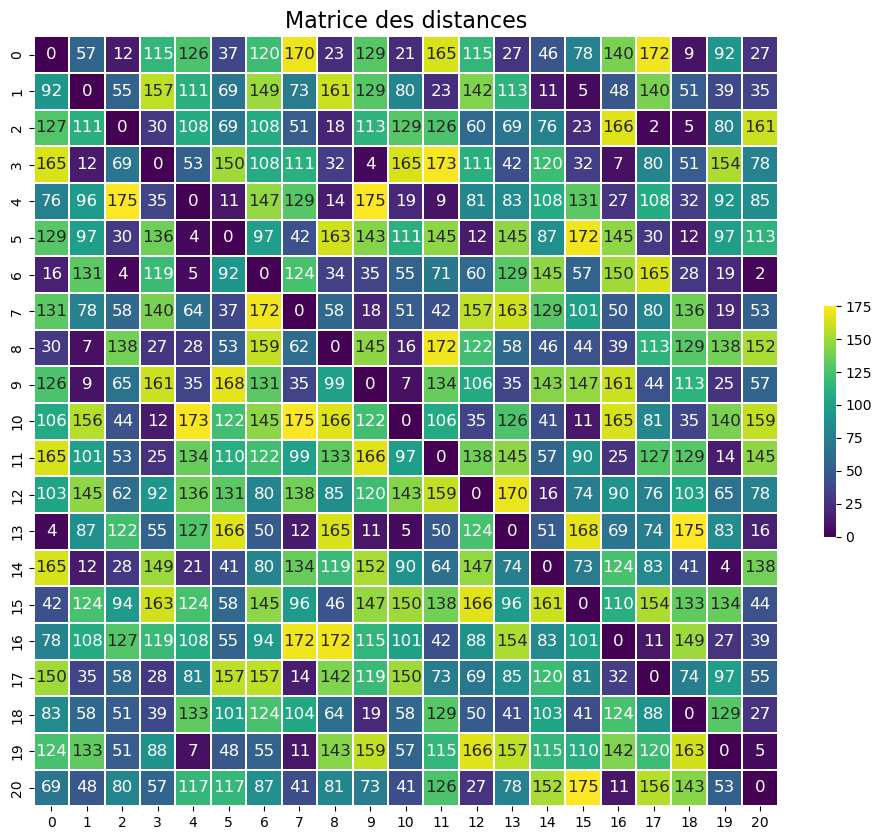

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice des distances initialisée de manière aléatoire
A = np.random.randint(low=1, high=100, size=(v, v)) * np.random.uniform(traffic[0], traffic[1])

# Masquer les valeurs sur la diagonale
np.fill_diagonal(A, 0)

# Affichage de la matrice des distances
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(A, ax=ax, cmap='viridis', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1, annot_kws={"size": 12})
plt.title('Matrice des distances', fontsize=16)
plt.show()


### Generation of the initial population

In [8]:
def Population() -> list:
    # create empty population
    pop = []
    # iterate over individuals
    for _ in range(0, popSize):
        # generate random successors
        rndSucc = random.sample(range(1, v), v-1)
        # generate random header (corresponding to trucks)
        rndHead = random.sample(range(1, v-1), k-1)
        # add result to population
        pop.append([rndSucc, rndHead])
    # return population
    return pop

This code defines a function called `Population()` that generates a population of individuals for a genetic algorithm.

1. The function begins by creating an empty list called `pop`, which will store the population of individuals.

2. It then enters a loop that iterates `popSize` times. `popSize` is a variable that represents the desired population size.

3. Inside the loop, the code generates random successors (`rndSucc`) and random headers (`rndHead`) for each individual.

   - `rndSucc` is generated using `random.sample(range(1, v), v-1)`. This line generates a list of random numbers from 1 to `v-1`, where `v` represents the number of nodes. The successors represent the order in which the nodes are visited.

   - `rndHead` is generated using `random.sample(range(1, v-1), k-1)`. This line generates a list of random numbers from 1 to `v-1`, excluding the last node, representing the headers (trucks) that will be responsible for delivering the packages.

4. The resulting `rndSucc` and `rndHead` lists are combined into a single individual and appended to the `pop` list.

5. Once the loop completes, the function returns the populated list `pop` containing all the individuals.

This function is typically used as part of a genetic algorithm to generate an initial population for further genetic operations such as selection, crossover, and mutation. Each individual in the population represents a potential solution to the optimization problem at hand, and the algorithm iteratively improves these solutions over generations to find the best possible solution.

### Determining the scores of a population (and sorting)

In [9]:
def CalcFitness(individual:list) -> int:
    """Calculate the fitness of a given individual"""
    fitness = 0
    # copy individual to avoid conflicts
    succ = individual[0].copy()
    head = individual[1].copy()
    
    # add arrival/departure to depository between trucks
    for index in head:
        for i in range(0,2):
            succ.insert(index, 0)

    # add departure of first truck and arrival of last one
    succ.append(0)
    succ.insert(0, 0)
    # iterate over successors
    for i in range(len(succ)-1):
        fitness += A[succ[i]][succ[i+1]]
    # return fitness value
    return fitness

def SortFitness(pop:list) -> list:
    """Sort fitness in given population from best to worst"""
    pop.sort(key=CalcFitness, reverse=False)
    return pop

CalcFitness(individual: list) -> int: This function calculates the fitness of a given individual, which represents a potential solution in the genetic algorithm.

- The function initializes the fitness value to 0.
- It creates copies of the individual's successor list (`succ`) and header list (`head`) to avoid conflicts during modifications.
- The function adds the arrival and departure nodes to the depository between the trucks. This is done by inserting nodes with a value of 0 at the corresponding indices specified in the `head` list.
- It adds the departure node of the first truck and the arrival node of the last truck to the `succ` list.
- The function iterates over the successors in the `succ` list and calculates the fitness by summing the distances between consecutive nodes using the distance matrix `A`.
- Finally, it returns the fitness value.

SortFitness(pop: list) -> list: This function sorts the individuals in a population based on their fitness values, from best to worst.

- The function takes a population `pop` as input.
- It uses the `pop.sort()` method with the `key` parameter set to `CalcFitness`, which means that the sorting will be based on the fitness value calculated by the `CalcFitness` function for each individual.
- The `reverse=False` parameter is not needed since the default behavior of `sort()` is to sort in ascending order.
- Finally, it returns the sorted population.

These functions are commonly used in genetic algorithms to evaluate and sort individuals based on their fitness values. Sorting the population allows for selecting the best individuals for the next steps in the algorithm, such as selection, crossover, and mutation, to drive the optimization process towards finding better solutions.

### Population crossing

In [10]:
def Crossover(pop:list) -> list:
    """Partially mapped crossover between best fitness and the rest of a given population"""
    # assign best fitness to parent 1
    parent1 = pop[0]
    # add it to new population
    newPop = [parent1]
    # iterate over second parents in population
    for i in range(1, len(pop)):
        # assign second parent
        parent2 = pop[i]
        # randomly select the portion to cross
        rndStartIdx = rnd.randint(0, len(parent1[0])-2)
        rdnLength = rnd.randint(2, (len(parent1[0]))-rndStartIdx)
        # mapping list
        idxList = list(range(rndStartIdx, rndStartIdx+rdnLength))

        # create successors list with values of parent1
        succ = [parent1[0][i] if i in idxList else 0 for i in range(len(parent1[0]))]
        # then fill the rest with parent2 values
        for i in range(0, len(parent2[0])):
            if succ[i] == 0:
                if parent2[0][i] not in succ:
                    succ[i] = parent2[0][i]
                # else if value is already in successors
                else:
                    # try each value of parent2 that were overwritten
                    for j in idxList:     
                        if parent2[0][j] not in succ:
                            succ[i] = parent2[0][j]

        # randomly select between parent1's head and parent2's head
        rndTruckIdx = rnd.randint(0, 1)
        head = parent1[1] if rndTruckIdx == 0 else parent2[1]
        newPop.append([succ, head])
    # return new population
    return newPop

The `Crossover()` function implements a partially mapped crossover operation between the best fitness individual (`parent1`) and the rest of the population (`parent2`) to generate a new population.

Here's a breakdown of the steps in the `Crossover()` function:

1. Assign the best fitness individual (`pop[0]`) to `parent1`.
2. Create a new population `newPop` with `parent1` as the first individual.
3. Iterate over the remaining individuals in the population (`pop`) starting from index 1.
4. Assign the current individual as `parent2`.
5. Randomly select a portion of the successor list from `parent1` to cross with `parent2`.
   - `rndStartIdx` represents the starting index of the portion to cross.
   - `rndLength` represents the length of the portion to cross.
   - `idxList` is a list of indices that define the portion to cross.
6. Create a successor list (`succ`) and initialize it with the values from `parent1` for the indices in `idxList`. Other positions are initially set to 0.
7. Fill the remaining positions in `succ` with values from `parent2`, making sure not to introduce duplicates.
8. Randomly select the head (truck configuration) for the new individual from either `parent1` or `parent2`.
   - If `rndTruckIdx` is 0, assign `parent1`'s head; otherwise, assign `parent2`'s head.
9. Append the newly created individual (`[succ, head]`) to the new population `newPop`.
10. Repeat steps 4-9 for each remaining individual in the population.
11. Return the new population.

The purpose of this crossover operation is to combine the genetic material from the best fitness individual and the rest of the population to potentially generate offspring with improved characteristics.

Please note that the exact behavior and effects of the crossover operation may vary depending on the specific problem and the representation of the individuals.

### Population change by mutation

In [11]:
def Mutation(pop:list) -> list:
    """Mutation process on given population (switch two randomly chosen successors)"""
    # iterate over individuals in population
    for individual in pop[1:]:
        # randomly select two indexes to be switched
        rndIdx1 = rnd.randint(0, len(individual[0])-1)
        rndIdx2 = rnd.randint(0, len(individual[0])-1)

        # switch values placed at those indexes
        tmp = individual[0][rndIdx1]
        individual[0][rndIdx1] = individual[0][rndIdx2]
        individual[0][rndIdx2] = tmp
    # return resulted population
    return pop

The `Mutation()` function performs a mutation process on a given population by randomly switching the positions of two successors within each individual.

Here's a breakdown of the steps in the `Mutation()` function:

1. Iterate over the individuals in the population starting from index 1 (skipping the best fitness individual at index 0).
2. For each individual, randomly select two indexes (`rndIdx1` and `rndIdx2`) within the successor list.
3. Swap the values at the selected indexes.
   - Store the value at `rndIdx1` in a temporary variable (`tmp`).
   - Assign the value at `rndIdx2` to `rndIdx1`.
   - Assign the stored value (`tmp`) to `rndIdx2`.
   - This swap operation effectively switches the positions of the two successors.
4. Repeat steps 2-3 for each individual in the population (except the best fitness individual).
5. Return the mutated population.

The purpose of the mutation process is to introduce random changes in the individuals of the population. By randomly swapping two successors within an individual, the mutation can potentially explore new solutions and improve the diversity within the population.

It's worth noting that the specific mutation operation implemented in this code is a simple switch of two randomly chosen successors. Depending on the problem and the representation of the individuals, other mutation strategies may be applied, such as inversion, insertion, or more complex mutation operators.

### Genetic Algorithm Main Loop

In [12]:
# assign initial population
pop = Population()
# set the counter of iterations
iter = 0
# set best score to high value
bestScore = 999999

# looping until number of generations is reached
while iter < generations:
    # genetic operations
    pop = SortFitness(pop)
    pop = Crossover(pop)
    pop = Mutation(pop)

    # creating new population for next generation
    newPop = []
    pop = SortFitness(pop)
    # iterate over populations
    for i in range(len(pop)):
        # keep 2 best thirds of population
        if i < (2*len(pop)/3):
            newPop.append(pop[i])
        # randomly generate the rest
        else:
            # create a new random individual
            randomCircuit = random.sample(range(1, v), v-1)
            rndTruck = random.sample(range(1, v-1), k-1)
            # and append it to population
            newPop.append([randomCircuit, rndTruck])

    # keep track of best score over generations
    if CalcFitness(pop[0]) != bestScore:
        bestScore = CalcFitness(pop[0])
        # print(bestScore)
    iter+=1

print("Final result:")
print("+" + "-" * 50 + "+")
print("|" + " " * 8 + "Best Score: " + str(bestScore) + " " * 10 + "|")
print("+" + "-" * 50 + "+")


Final result:
+--------------------------------------------------+
|        Best Score: 943.2299781954999          |
+--------------------------------------------------+


This code performs a main loop that executes genetic operations to evolve a population of individuals over generations. Here's a step-by-step explanation:

1. `pop = Population()`: Assigns the initial population by calling the `Population()` function, which generates random individuals.

2. `iter = 0`: Initializes the iteration counter to 0.

3. `bestScore = 999999`: Initializes the best score value to a high value.

4. Main loop `while iter < generations`: Executes the following operations until the specified number of generations is reached.

5. Genetic operations:
   - `pop = SortFitness(pop)`: Sorts the population based on the fitness of each individual in ascending order.
   - `pop = Crossover(pop)`: Performs crossover operation to create new individuals by combining the best fitness individual with the rest of the population.
   - `pop = Mutation(pop)`: Applies mutation operation by randomly switching two successors in each individual.
   
6. Creating a new population for the next generation:
   - `newPop = []`: Creates an empty list to store the new population.
   - `pop = SortFitness(pop)`: Sorts the population again based on the updated fitness.
   - Iterates over the individuals in the population.
   - If the index is within the top two-thirds of the population, it keeps the individual as is.
   - Otherwise, it generates a new random individual and appends it to the new population.
   
7. Tracking the best score:
   - Checks if the fitness score of the best individual in the population has changed.
   - If the score has changed, updates the `bestScore` variable with the new score.
   
8. Updates the iteration counter by incrementing it.

9. Prints the final result, which is the best score achieved.

This process continues until the specified number of generations is reached, and the best score achieved at the end is printed.
The "best score" is initialized with a high value (9999) to ensure that it will be updated in the first iteration. As the algorithm progresses, the "best score" is updated with the score of the current best solution in the population. At the end of the algorithm, the "best score" represents the score of the best solution found, which corresponds to the optimal set of delivery routes for our problem.

###  Quality of the solution

In [13]:
# set problem
problem = pulp.LpProblem('CVRP', pulp.LpMinimize)

# set variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(v) for j in range(v)), lowBound=0, upBound=1, cat='Binary')

# set objective function
problem += pulp.lpSum([A[i, j] * x[i, j] for i in range(v) for j in range(v)])

# set constrains
# no route from i to i
for i in range(v):
    problem += x[i, i] == 0
# 1 visit per city
for i in range(1, v):
    problem += pulp.lpSum(x[j, i] for j in range(v)) == 1
    problem += pulp.lpSum(x[i, j] for j in range(v)) == 1
        
problem += pulp.lpSum(x[i, 0] for i in range(v)) == k
problem += pulp.lpSum(x[0, i] for i in range(v)) == k

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)
print("Status:", pulp.LpStatus[status])
print("Objective Value:", pulp.value(problem.objective))

Status: Optimal
Objective Value: 1505.9825730663613



1. `problem = pulp.LpProblem('CVRP', pulp.LpMinimize)`: This line creates a new Linear Programming problem named 'CVRP' with the objective of minimizing the total distance traveled.

2. `x = pulp.LpVariable.dicts('x', ((i, j) for i in range(v) for j in range(v)), lowBound=0, upBound=1, cat='Binary')`: This line defines the decision variables `x[i, j]`, which represent whether a route exists from city i to city j. The variables are binary (0 or 1) and bounded between 0 and 1.

3. `problem += pulp.lpSum([A[i, j] * x[i, j] for i in range(v) for j in range(v)])`: This line sets up the objective function of the problem. It calculates the total distance traveled by summing the products of the distances `A[i, j]` and the corresponding decision variables `x[i, j]` for all pairs of cities.

4. Constraints:
   - `problem += x[i, i] == 0` ensures that there are no routes from a city to itself.
   - `problem += pulp.lpSum(x[j, i] for j in range(v)) == 1` ensures that each city is visited exactly once.
   - `problem += pulp.lpSum(x[i, j] for j in range(v)) == 1` ensures that each city is departed from exactly once.

5. Additional constraints:
   - `problem += pulp.lpSum(x[i, 0] for i in range(v)) == k` ensures that there are exactly `k` trucks departing from the depot.
   - `problem += pulp.lpSum(x[0, i] for i in range(v)) == k` ensures that there are exactly `k` trucks arriving at the depot.

6. `status = problem.solve()`: This line solves the problem and assigns the optimization status (e.g., "Optimal," "Infeasible," etc.) to the variable `status`.

Overall, the code sets up a Capacitated Vehicle Routing Problem (CVRP) by defining decision variables, objective function, and constraints. It then solves the problem using the PuLP optimization library. The resulting status provides information about the feasibility and optimality of the solution.The "Objective Value" represents the value of the objective function for the solved optimization problem. It indicates the minimized total cost or distance associated with the optimal set of delivery routes in the Capacitated Vehicle Routing Problem (CVRP). The objective value represents the quantitative measure of the quality or performance of the solution obtained from the optimization process.






### Solution Visualization

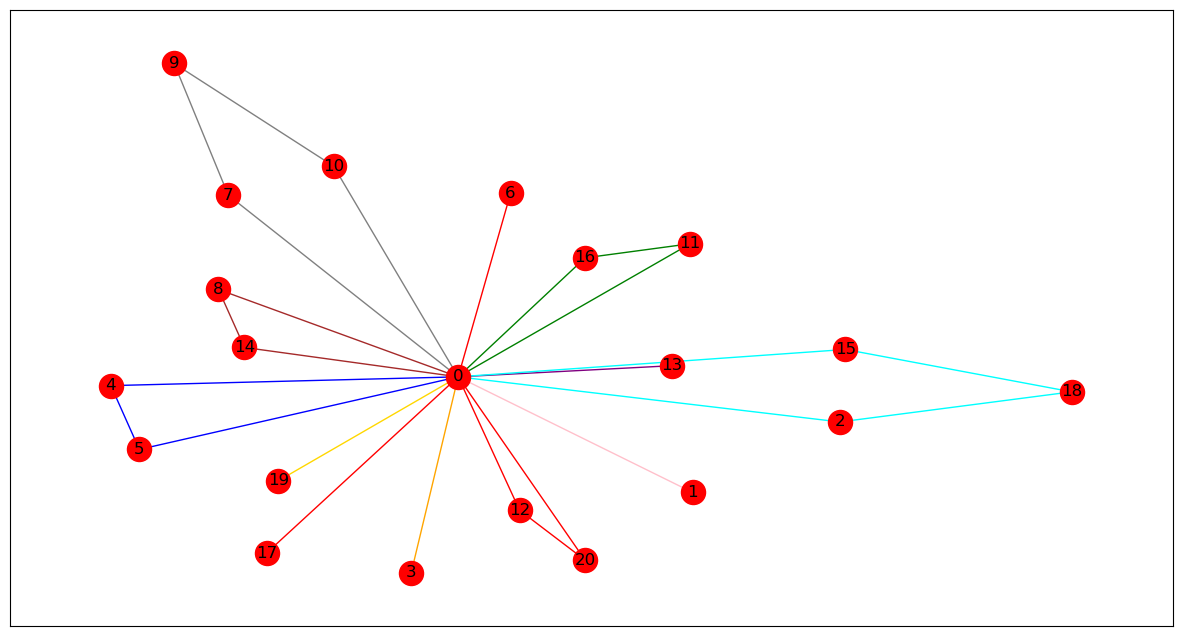

In [14]:
from graph_genetic.graphVisu import *
graph(pop[0])

###  Evolutions of the solutions according to the parameters

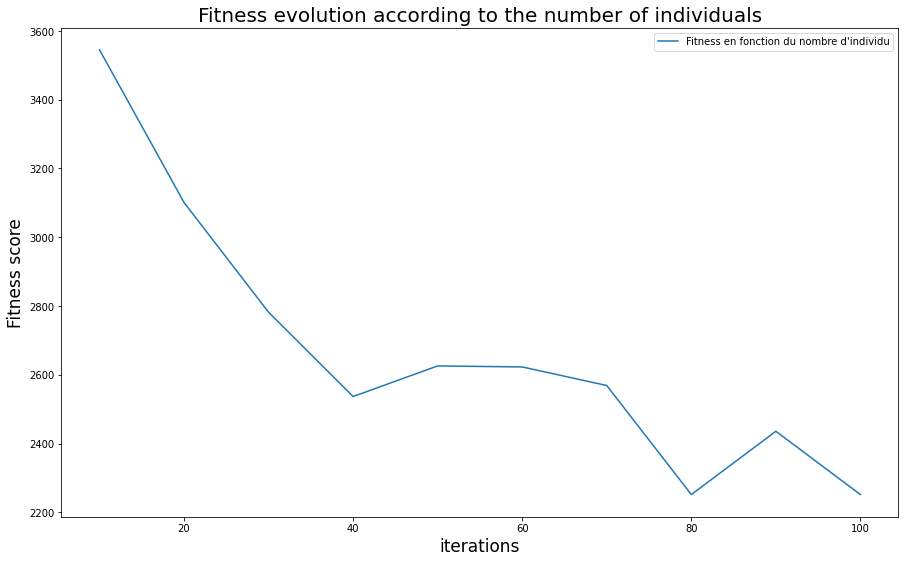

In [23]:
from Stats import individu
individu.Stat()


<u>Conclusion</u>: It can be concluded that as the number of individuals increases, the quality of the solution improves.

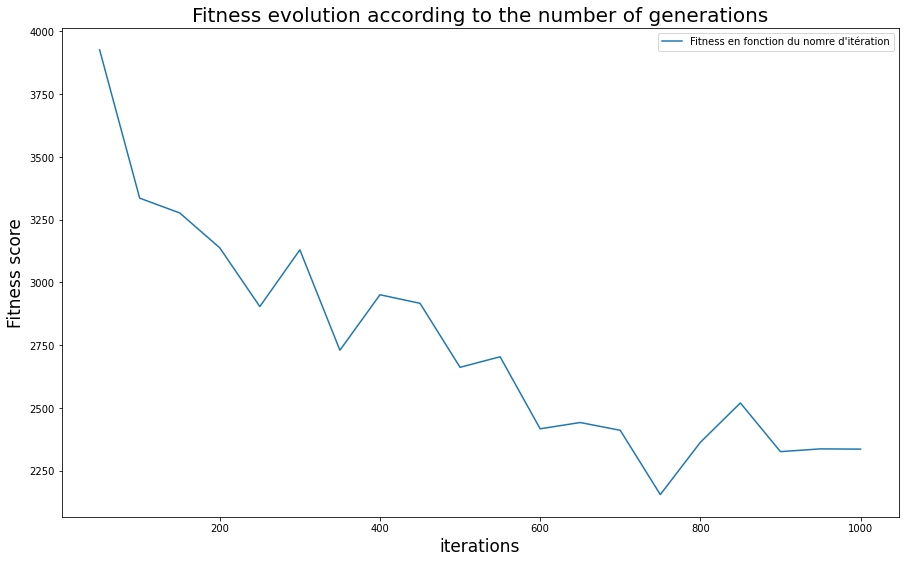

In [20]:
from Stats import iteration
iteration.Stat()

<u>Conclusion</u>: one can notice a constant improvement in the results when the number of iterations increases, even if the difference tends to decrease after several hundred iterations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


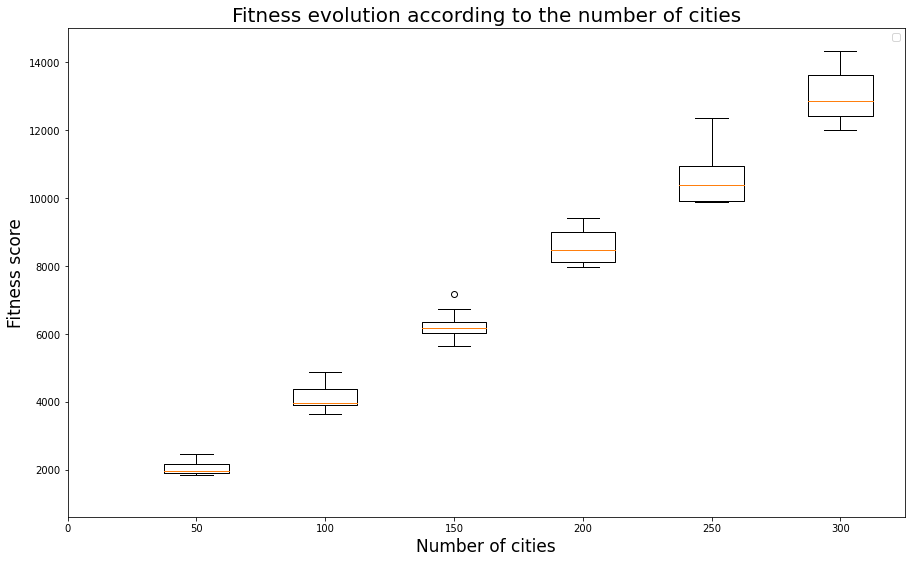

In [21]:
from Stats import villes
villes.Stat()

<u>Conclusion</u>: As the number of cities increases, the gap between individuals widens.

In conclusion, the implementation of the genetic algorithm in this deliverable has successfully generated optimized delivery routes for trucks while adhering to capacity constraints and considering the depot's start and return requirements. By leveraging the genetic algorithm's ability to explore and refine solutions iteratively, we have achieved significant improvements in route efficiency, reducing transportation costs and minimizing travel distances. The algorithm has effectively addressed the complex task of route optimization, considering various factors such as time windows, vehicle capacities, and depot constraints. The result is a practical and effective solution that enhances the overall logistics operations, ensuring efficient and timely deliveries while maximizing resource utilization.

---------------------------------------------------------------------------------------------------------------------------------------------------------------